In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [2]:
digits = datasets.load_digits()

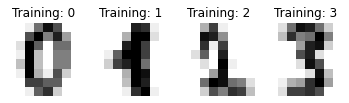

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.title('Training: %i' % label)
    plt.imshow(image, cmap='binary', interpolation='nearest')


In [4]:
X, y = digits['data'], digits['target']
X.shape # 1797 valores (imagens) 8 x 8

(1797, 64)

In [5]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
y[0]

0

(-0.5, 7.5, 7.5, -0.5)

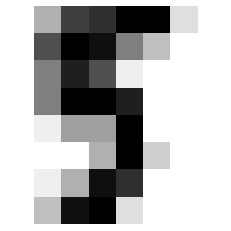

In [22]:
plt.imshow(X[0].reshape(8,8), cmap='binary')
plt.axis('off')

In [43]:
# Selecionando parte dos vetores para treinamento e teste
nElem = int(len(X)*.8) # 80% dos elementos para treinamento e 20% para testes
XTrain, XTest, yTrain, yTest = X[:nElem], X[nElem:], y[:nElem], y[nElem:]

In [44]:
from sklearn.linear_model import SGDClassifier
sgdClf = SGDClassifier(random_state=42)

In [45]:
#Criando um classificador para o valor 5
yTrain5 = (yTrain == 5)
yTest5 = (yTest == 5)
sgdClf.fit(XTrain, yTrain5) # Executando o treinamento

SGDClassifier(random_state=42)

(-0.5, 7.5, 7.5, -0.5)

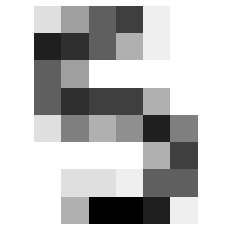

In [35]:
plt.imshow(XTest[3].reshape(8,8), cmap='binary')
plt.axis('off')

In [40]:
sgdClf.predict([XTest[3]])

array([ True])

In [55]:
esperado = yTest5
predito = sgdClf.predict(XTest)
print("Relatório de Classificação: %s\n%s\n" % (sgdClf, metrics.classification_report(esperado, predito)))

Relatório de Classificação: SGDClassifier(random_state=42)
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       323
        True       0.95      1.00      0.97        37

    accuracy                           0.99       360
   macro avg       0.97      1.00      0.99       360
weighted avg       0.99      0.99      0.99       360




In [56]:
# Validação Cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for trainIndex, testIndex in skfolds.split(XTrain, yTrain5):
  cloneClf = clone(sgdClf)
  XTrainFolds = XTrain[trainIndex]
  yTrainFolds = yTrain5[trainIndex]
  XTestFolds = XTrain[testIndex]
  yTestFolds = yTrain5[testIndex]
  cloneClf.fit(XTrainFolds, yTrainFolds)
  yPred = cloneClf.predict(XTestFolds)
  nCorrect = sum(yPred == yTestFolds)
  print("Relatório de Classificação: %s\n%s\n" % (cloneClf, metrics.classification_report(yTestFolds, yPred)))
  print(nCorrect/len(yPred)) # Calculando a Acuracia

Relatório de Classificação: SGDClassifier(random_state=42)
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       431
        True       0.98      0.88      0.92        48

    accuracy                           0.99       479
   macro avg       0.98      0.94      0.96       479
weighted avg       0.99      0.99      0.99       479


0.9853862212943633
Relatório de Classificação: SGDClassifier(random_state=42)
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       431
        True       0.98      0.88      0.92        48

    accuracy                           0.99       479
   macro avg       0.98      0.94      0.96       479
weighted avg       0.99      0.99      0.99       479


0.9853862212943633
Relatório de Classificação: SGDClassifier(random_state=42)
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       430
        True       0

In [57]:
# Classificador por vetor de apoio (support vector)
svmClf = svm.SVC(gamma=0.001)
svmClf.fit(XTrain, yTrain5)
esperado2 = yTest5
predito2 = svmClf.predict(XTest)
print("Relatório de Classificação: %s\n%s\n" % (svmClf, metrics.classification_report(esperado2, predito2)))

Relatório de Classificação: SVC(gamma=0.001)
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       323
        True       0.95      1.00      0.97        37

    accuracy                           0.99       360
   macro avg       0.97      1.00      0.99       360
weighted avg       0.99      0.99      0.99       360


